In [6]:
import numpy as np

In [7]:
class Linear_Regression:
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self,X,Y):
        self.m,self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.no_of_iterations):
            self.update_weight()
    
    def update_weight(self):
        Y_prediction = self.predict(self.X)
        dw = - (2 * (self.X.T).dot(self.Y-Y_prediction))/self.m
        db = - 2 * np.sum(self.Y-Y_prediction)/self.m
        
        self.w = self.w-self.learning_rate*dw
        self.b = self.b-self.learning_rate*db
        
    def predict(self,X):
        return X.dot(self.w) + self.b
        
        

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
salary_data = pd.read_csv("C:\\Users\\Risathvik\\Downloads\\salary_data.csv")

In [11]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
salary_data.shape

(30, 2)

In [13]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [27]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
model = Linear_Regression(0.02,1000)

In [39]:
model.fit(X_train,Y_train)

In [40]:
print('weight = ',model.w)
print('bias = ',model.b)

weight =  [9570.88886099]
bias =  24384.029598697263


In [41]:
test_data_prediction = model.predict(X_test)

In [42]:
test_data_prediction

array([36826.18511799, 34912.00734579, 67453.02947316, 59796.31838437,
       92337.34051174, 81809.36276465])

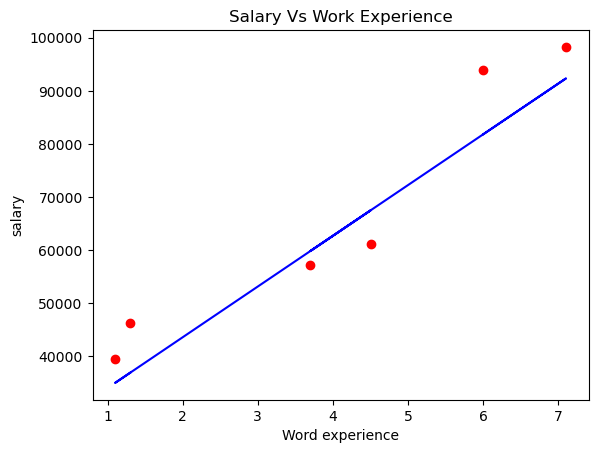

In [43]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Word experience')
plt.ylabel('salary')
plt.title('Salary Vs Work Experience')
plt.show()